In [1248]:
from param_analysis import ParameterAnalysis
from plots import *

What I have found so far is that with really high ecb values like 9, agents make up their mind super quickly. then they only tweet one thing no matter what they read, they end up tweeting whatever is the majority belief of their neighbours, and they don't bother choosing not to sample the agents that disagree because the amount which these agents affect their beliefs has negligible towards actually changing opinion. 

In contrast with lower ecb values like 5, agents can tend to never make up their minds. 

In [1250]:
import numpy as np
import matplotlib.pyplot as plt

In [1258]:

connectedness_values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ecb_precision_gammas = [4,5,6,7,8,9]

num_agent_values = [4,6,8]


env_precision_gammas = [10]
b_precision_gammas = [5]

n_trials = 30

In [1259]:
params = ParameterAnalysis('results/testr2.npz','results/testp2.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [1260]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-1]

In [1261]:
params.param_results.shape

(30, 3, 7, 6, 6, 6)

In [1262]:
params.get_overall_metrics()

In [1263]:
def get_params(param_values):
    n = num_agent_values.index(param_values[0])
    c = connectedness_values.index(param_values[1])
    ecb = ecb_precision_gammas.index(param_values[2])
    env = 0
    b = 0
    ecb_precision = params.param_results[0,n,c,ecb,env,b][0][0]
    env_precision = params.param_results[0,n,c,ecb,env,b][0][1]
    b_precision = params.param_results[0,n,c,ecb,env,b][0][2]
    idea_mappings = [params.param_results[0,n,c,ecb,env,b][i][3] for i in range(param_values[0])]
    return (ecb_precision, env_precision, b_precision),idea_mappings

In [1264]:
lowest_db_index = np.where(params.db_indices == min(params.db_indices))[0][0]

print("Lowest DB index")
db_params = list(params.get_param_combinations())[lowest_db_index]
print(db_params)
print(params.db_indices[lowest_db_index])
print(get_params(db_params))


Lowest DB index
(8, 0.2, 5, 5, 10)
0.4482541874142912
((array(6.27173834), array(8.48433653), array(1.18447132)), [array([[0.85470169, 0.14529831],
       [0.14529831, 0.85470169]]), array([[0.90540689, 0.09459311],
       [0.09459311, 0.90540689]]), array([[0.94255064, 0.05744936],
       [0.05744936, 0.94255064]]), array([[0.64475922, 0.35524078],
       [0.35524078, 0.64475922]]), array([[0.61634455, 0.38365545],
       [0.38365545, 0.61634455]]), array([[0.81716899, 0.18283101],
       [0.18283101, 0.81716899]]), array([[0.93133855, 0.06866145],
       [0.06866145, 0.93133855]]), array([[0.87971106, 0.12028894],
       [0.12028894, 0.87971106]])])


In [1265]:
clustering_data = {}

for c in connectedness_values:
    #find all parameter combinations with this connectedness value
    c_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,1],c))[0]
    #what are the db indices for these parameters?
    c_db_indices = params.db_indices[c_indices]
    #what is the smallest one?
    lowest_db_index = np.where(c_db_indices == min(c_db_indices))[0][0]
    highest_db_index = np.where(c_db_indices == max(c_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
    
    #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[c_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[c_indices[highest_db_index]]
   # (ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
 #   (ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[c] = {"optimal_params" : optimal_params, "lowest_db":c_db_indices[lowest_db_index],
                         # "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : c_db_indices[highest_db_index]}
                         
                        # "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }



In [1266]:
#officially confirmed that high ECB leads to clustering, low ECB leads to no clustering. 
#any sparseness can lead to clustering, but generally lots of agents in a sparse graphleads to clustering, and less agents in a non sparse graph leads to no clustering

#the question now is: why?

In [1267]:
clustering_data

{0.2: {'optimal_params': (8, 0.2, 5, 5, 10),
  'lowest_db': 0.4482541874142912,
  'suboptimal_params': (4, 0.2, 8, 5, 10),
  'highest_db': 0.9351897155891004},
 0.3: {'optimal_params': (8, 0.3, 4, 5, 10),
  'lowest_db': 0.4701443591370528,
  'suboptimal_params': (4, 0.3, 8, 5, 10),
  'highest_db': 0.9666666667897383},
 0.4: {'optimal_params': (4, 0.4, 4, 5, 10),
  'lowest_db': 0.5481881683186212,
  'suboptimal_params': (4, 0.4, 7, 5, 10),
  'highest_db': 0.985566270133593},
 0.5: {'optimal_params': (6, 0.5, 4, 5, 10),
  'lowest_db': 0.6216354675291875,
  'suboptimal_params': (4, 0.5, 8, 5, 10),
  'highest_db': 1.0},
 0.6: {'optimal_params': (8, 0.6, 4, 5, 10),
  'lowest_db': 0.5962219357850361,
  'suboptimal_params': (4, 0.6, 9, 5, 10),
  'highest_db': 1.0},
 0.7: {'optimal_params': (8, 0.7, 4, 5, 10),
  'lowest_db': 0.5595113332785628,
  'suboptimal_params': (6, 0.7, 7, 5, 10),
  'highest_db': 0.9734854000740787},
 0.8: {'optimal_params': (8, 0.8, 4, 5, 10),
  'lowest_db': 0.623740873

In [1268]:
clustering_data = {}

for ecb in ecb_precision_gammas:
    #find all parameter combinations with this connectedness value
    ecb_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],ecb))[0]
    #what are the db indices for these parameters?
    ecb_db_indices = params.db_indices[ecb_indices]
    
    #what is the smallest one?
    lowest_db_index = np.where(ecb_db_indices == min(ecb_db_indices))[0][0]
    highest_db_index = np.where(ecb_db_indices == max(ecb_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
        #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[ecb_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[ecb_indices[highest_db_index]]
    #(ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
    #(ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[ecb] = {"optimal_params" : optimal_params, "lowest_db":ecb_db_indices[lowest_db_index],
                       #   "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : ecb_db_indices[highest_db_index]}
                         
                      #   "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }



In [1269]:
def similarity_matrix(belief_hist):
    T = belief_hist.shape[0]

    KLD_intra_beliefs = get_KLDs(belief_hist)
    believers = np.where(belief_hist[-1,0,:] > 0.5)
    nonbelievers = np.where(belief_hist[-1,0,:] < 0.5)
    cluster_sorted_indices = [i for i in believers[0]]
    for j in nonbelievers[0]:
        cluster_sorted_indices.append(j)

    
    color_map = plt.cm.get_cmap('gray').reversed()


    single_slice = KLD_intra_beliefs[:,:,-1]
    sorted_slice = single_slice[cluster_sorted_indices,:][:,cluster_sorted_indices]
    plt.imshow(sorted_slice, cmap = color_map)
    plt.title("Belief similarity matrix")
    plt.show()
    plt.clf()

In [1270]:
clustering_data

{4: {'optimal_params': (8, 0.3, 4, 5, 10),
  'lowest_db': 0.4701443591370528,
  'suboptimal_params': (4, 0.8, 4, 5, 10),
  'highest_db': 0.8355244512737297},
 5: {'optimal_params': (8, 0.2, 5, 5, 10),
  'lowest_db': 0.4482541874142912,
  'suboptimal_params': (4, 0.8, 5, 5, 10),
  'highest_db': 0.9055974803966914},
 6: {'optimal_params': (8, 0.2, 6, 5, 10),
  'lowest_db': 0.6546700028082587,
  'suboptimal_params': (6, 0.8, 6, 5, 10),
  'highest_db': 0.942341356494786},
 7: {'optimal_params': (6, 0.4, 7, 5, 10),
  'lowest_db': 0.6184238263794098,
  'suboptimal_params': (4, 0.4, 7, 5, 10),
  'highest_db': 0.985566270133593},
 8: {'optimal_params': (8, 0.2, 8, 5, 10),
  'lowest_db': 0.613248453186691,
  'suboptimal_params': (4, 0.5, 8, 5, 10),
  'highest_db': 1.0},
 9: {'optimal_params': (8, 0.2, 9, 5, 10),
  'lowest_db': 0.571753836263273,
  'suboptimal_params': (4, 0.6, 9, 5, 10),
  'highest_db': 1.0}}

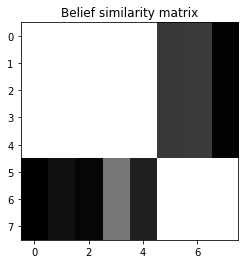

<Figure size 432x288 with 0 Axes>

In [1289]:
optimal_params = [8, 0.2, 5, 5, 10]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs
kld_matrices = similarity_matrix(beliefs[16,:,:,:])

In [1283]:
#General question: Do agents who are connected usually end up in the same cluster? 

#just get two lists, the cluster lists, and then the connnected lists ?

In [1290]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [1291]:
#now we want to investigate what happened during the best simulation

In [1298]:
trial = 16

In [1299]:
test_params = [8,0.2,5,5,10]
params.update_params(test_params)
beliefs = params.all_qs


In [1300]:
#what are the clusters? 
all_beliefs_t = beliefs[trial,:,:,:] 
cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)

In [1301]:
cluster1

(array([0, 3, 4]),)

In [1302]:
cluster2

(array([1, 2, 5, 6, 7]),)

In [1303]:
result = params.get_all_sim_results_from_parameters()


In [1304]:
print(get_params(test_params))

((array(6.27173834), array(8.48433653), array(1.18447132)), [array([[0.85470169, 0.14529831],
       [0.14529831, 0.85470169]]), array([[0.90540689, 0.09459311],
       [0.09459311, 0.90540689]]), array([[0.94255064, 0.05744936],
       [0.05744936, 0.94255064]]), array([[0.64475922, 0.35524078],
       [0.35524078, 0.64475922]]), array([[0.61634455, 0.38365545],
       [0.38365545, 0.61634455]]), array([[0.81716899, 0.18283101],
       [0.18283101, 0.81716899]]), array([[0.93133855, 0.06866145],
       [0.06866145, 0.93133855]]), array([[0.87971106, 0.12028894],
       [0.12028894, 0.87971106]])])


In [1330]:
agent = 3

In [1331]:
#let's examine one agent 
agent_1_adj_mat = result['adj_mat'][:,agent,:]
agent_1_beliefs = result['all_qs'][:,:,:,agent]
agent_1_samplings = result['all_neighbour_sampling'][:,:,agent]
agent_1_tweets = result['all_tweets'][:,:,agent]

In [1332]:
neighbours = list(is_connected(agent_1_adj_mat[0])[0])

In [1333]:
neighbours

[0, 4, 7]

In [1334]:
agent_1_adj_mat[trial]

array([1., 0., 0., 0., 1., 0., 0., 1.])

In [1335]:
agent_1_tweets[trial]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1336]:
agent_1_reads = [result['all_tweets'][trial,t,int(s)] for t, s in enumerate(agent_1_samplings[trial])]


In [1337]:
agent_1_samplings[trial]

array([7., 7., 0., 4., 7., 0., 4., 7., 0., 4., 7., 0., 4., 7., 0., 4., 7.,
       0., 4., 7., 0., 4., 7., 0., 4., 0., 7., 4., 0., 4., 7., 0., 4., 0.,
       4., 7., 0., 4., 0., 4., 7., 0., 4., 0., 4., 7., 0., 4., 0., 4., 7.])

In [1338]:
agent_1_reads

[0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]

In [1339]:
behaviour = [( agent_1_tweets[trial][t], agent_1_reads[t], agent_1_beliefs[trial,:,0][t], (agent_1_beliefs[trial,:,0][t] - agent_1_beliefs[trial,:,0][t-1] > 0)) for t in range(1,len(agent_1_reads)-1)]

In [1340]:
behaviour

[(0.0, 0.0, 0.6329719911261237, True),
 (0.0, 1.0, 0.5933647335336677, False),
 (0.0, 1.0, 0.550592011692205, False),
 (0.0, 0.0, 0.5983485476997599, True),
 (0.0, 1.0, 0.5587968908410168, False),
 (0.0, 1.0, 0.5168887196070476, False),
 (0.0, 0.0, 0.56295080457362, True),
 (0.0, 1.0, 0.5212966467127078, False),
 (0.0, 1.0, 0.47729986323231094, False),
 (1.0, 0.0, 0.521244620338583, True),
 (0.0, 1.0, 0.4772461597267177, False),
 (1.0, 1.0, 0.4309191172215409, False),
 (1.0, 0.0, 0.4722320543367332, True),
 (1.0, 1.0, 0.4256510755558601, False),
 (1.0, 1.0, 0.37680290526738636, False),
 (1.0, 0.0, 0.4147952125363344, True),
 (1.0, 1.0, 0.3654567380741589, False),
 (1.0, 1.0, 0.3141202232739144, False),
 (1.0, 0.0, 0.3478198236672538, True),
 (1.0, 1.0, 0.29591164141359383, False),
 (1.0, 1.0, 0.24296924754874877, False),
 (1.0, 0.0, 0.2710293722822146, True),
 (1.0, 1.0, 0.21810565586670977, False),
 (1.0, 1.0, 0.16683705481839148, False),
 (1.0, 1.0, 0.1270554661723254, False),
 (1.0,